In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/analise-dados-master/dados/sent_aggreg_price.csv')

In [4]:
dados

,Unnamed: 0,Date,Count_tweets,Sent_aggreg,Price
0,0,2015-07-31,1,0.616111,52.90
1,1,2015-08-31,3,0.021029,55.70
2,2,2015-09-30,0,0.500000,54.40
3,3,2015-10-31,4,0.025141,49.50
4,4,2015-11-30,5,0.010230,42.80
...,...,...,...,...,...
74,74,2021-09-30,11,0.161792,119.65
75,75,2021-10-31,7,0.331550,121.23
76,76,2021-11-30,9,0.181758,94.97
77,77,2021-12-31,7,0.321072,112.50


In [5]:
dados.drop(["Unnamed: 0"], axis=1, inplace=True)

In [6]:
dados

,Date,Count_tweets,Sent_aggreg,Price
0,2015-07-31,1,0.616111,52.90
1,2015-08-31,3,0.021029,55.70
2,2015-09-30,0,0.500000,54.40
3,2015-10-31,4,0.025141,49.50
4,2015-11-30,5,0.010230,42.80
...,...,...,...,...
74,2021-09-30,11,0.161792,119.65
75,2021-10-31,7,0.331550,121.23
76,2021-11-30,9,0.181758,94.97
77,2021-12-31,7,0.321072,112.50


In [7]:
dados.describe()

,Count_tweets,Sent_aggreg,Price
count,79.000000,79.000000,79.000000
mean,6.379747,0.254674,90.302152
std,5.189496,0.165029,39.877650
min,0.000000,0.010230,41.500000
25%,2.000000,0.129363,64.750000
50%,6.000000,0.233284,81.350000
75%,9.000000,0.335585,104.200000
max,23.000000,0.846314,214.550000


In [8]:
len(dados)

79

In [9]:
corr = dados.corr()
corr

<ipython-input-9-b567ad4110d4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dados.corr()


,Count_tweets,Sent_aggreg,Price
Count_tweets,1.000000,-0.361897,-0.145732
Sent_aggreg,-0.361897,1.000000,0.240483
Price,-0.145732,0.240483,1.000000


In [10]:
from string import ascii_letters
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

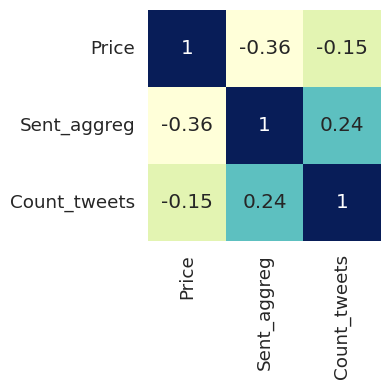

In [11]:
sns.set(font_scale=1.2)

labels = ['Price', 'Sent_aggreg', 'Count_tweets']

plt.figure(figsize=(3, 3))
ax = sns.heatmap(
    corr,
    annot=True,
    cmap="YlGnBu",
    cbar=False,
    xticklabels=labels,
    yticklabels=labels,
    # mask=np.triu(np.ones_like(corr, dtype=np.bool))
)

plt.show()

# Reseta as configurações para o padrão
sns.set()

FTS

In [12]:
!pip3 install -U git+https://github.com/PYFTS/pyFTS

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/PYFTS/pyFTS to /tmp/pip-req-build-49rcylp3
  Running command git clone --filter=blob:none --quiet https://github.com/PYFTS/pyFTS /tmp/pip-req-build-49rcylp3
  Resolved https://github.com/PYFTS/pyFTS to commit 4c77ecc73fa0888132ac3996ca7e1f519dcf2fc8
  Preparing metadata (setup.py) ... done
  Created wheel for pyFTS: filename=pyFTS-1.7-py3-none-any.whl size=217892 sha256=f6044ef31c2a6d9f141e21c34ae595f689bda0c0c5ba5c872644b145f7789cc4
  Stored in directory: /tmp/pip-ephem-wheel-cache-y_dayod6/wheels/7f/25/75/dd8f713bf48592da71e0441c7abdc1f5aa4d9645a6b7ee99d4
Successfully built pyFTS


Sentimentos minério

In [13]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt

from pyFTS.common import Util
from pyFTS.benchmarks import Measures
from pyFTS.partitioners import Grid,  Entropy #, Huarng
from pyFTS.models import hofts
from pyFTS.common import Membership

In [14]:
from pyFTS.common import Transformations

diff = Transformations.Differential(1)

In [15]:
precos=np.array(dados['Price'])

In [16]:
precos

array([ 52.9 ,  55.7 ,  54.4 ,  49.5 ,  42.8 ,  42.9 ,  41.5 ,  48.9 ,
        53.2 ,  65.2 ,  49.6 ,  54.2 ,  58.8 ,  59.  ,  55.2 ,  63.8 ,
        73.5 ,  81.8 ,  84.  ,  91.2 ,  79.8 ,  67.8 ,  57.8 ,  63.9 ,
        73.8 ,  77.2 ,  61.7 ,  58.7 ,  68.16,  72.4 ,  72.05,  78.02,
        64.89,  65.65,  64.88,  64.73,  67.67,  66.03,  68.11,  73.96,
        64.77,  71.3 ,  84.45,  83.43,  86.37,  93.79,  97.76, 112.9 ,
       115.55,  84.64,  92.24,  82.75,  86.01,  90.92,  81.35,  82.93,
        82.69,  82.37,  99.5 ,  98.45, 108.9 , 122.53, 123.98, 120.19,
       129.31, 158.15, 168.13, 165.61, 166.9 , 179.63, 205.73, 214.55,
       211.99, 159.25, 119.65, 121.23,  94.97, 112.5 , 131.15])

In [17]:
precos_dif=diff.apply(precos)

In [18]:
precos_dif

[0,
 2.8000000000000043,
 -1.3000000000000043,
 -4.899999999999999,
 -6.700000000000003,
 0.10000000000000142,
 -1.3999999999999986,
 7.399999999999999,
 4.300000000000004,
 12.0,
 -15.600000000000001,
 4.600000000000001,
 4.599999999999994,
 0.20000000000000284,
 -3.799999999999997,
 8.599999999999994,
 9.700000000000003,
 8.299999999999997,
 2.200000000000003,
 7.200000000000003,
 -11.400000000000006,
 -12.0,
 -10.0,
 6.100000000000001,
 9.899999999999999,
 3.4000000000000057,
 -15.5,
 -3.0,
 9.459999999999994,
 4.240000000000009,
 -0.3500000000000085,
 5.969999999999999,
 -13.129999999999995,
 0.7600000000000051,
 -0.7700000000000102,
 -0.14999999999999147,
 2.9399999999999977,
 -1.6400000000000006,
 2.0799999999999983,
 5.849999999999994,
 -9.189999999999998,
 6.530000000000001,
 13.150000000000006,
 -1.019999999999996,
 2.9399999999999977,
 7.420000000000002,
 3.969999999999999,
 15.14,
 2.6499999999999915,
 -30.909999999999997,
 7.599999999999994,
 -9.489999999999995,
 3.26000000

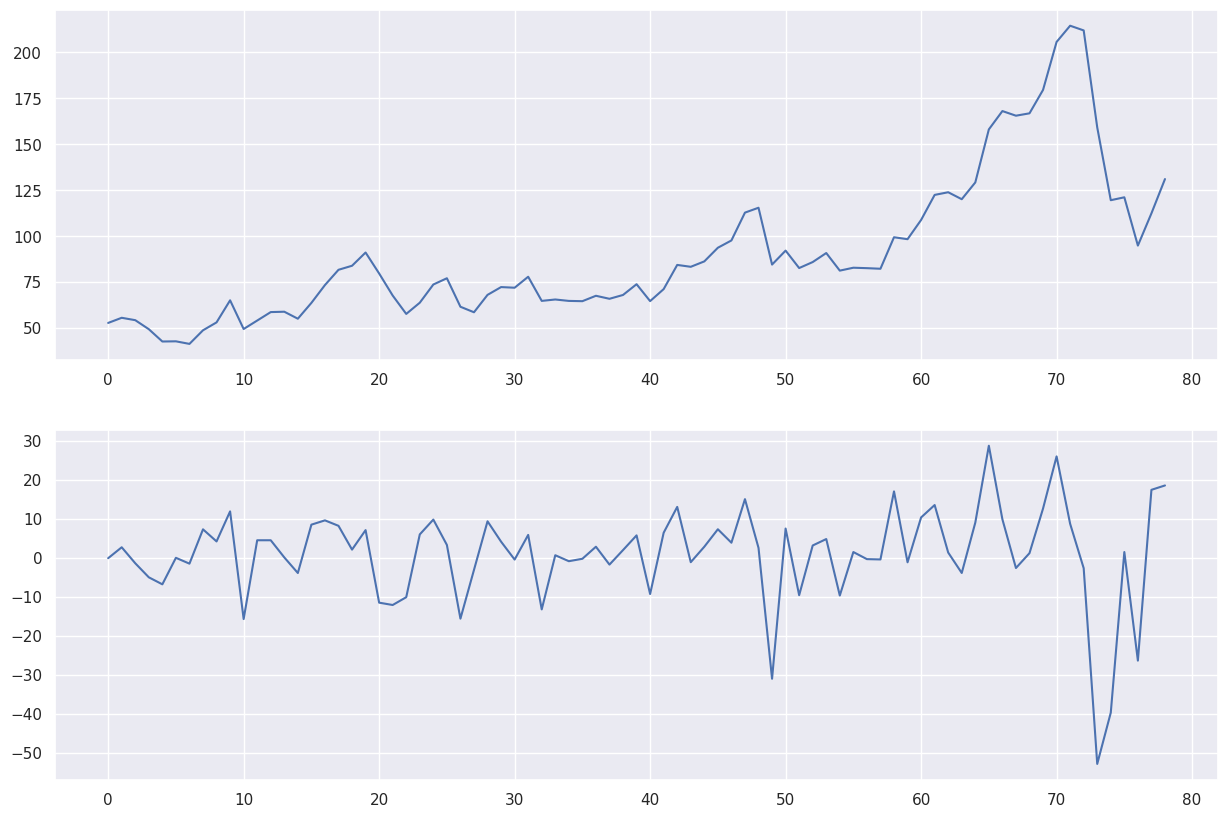

In [19]:
fig, ax = plt.subplots(nrows=2, ncols=1,figsize=[15,10])

ax[0].plot(precos)
ax[1].plot(diff.apply(precos))

Multivariável

In [20]:
models = []

In [21]:
#dados_comp = dados.drop(['Count_tweets', 'Date'], axis=1)

In [22]:
train_m = dados.iloc[:71]
test_m = dados.iloc[71:]

In [23]:
train_u = dados['Price'].values[:71]
test_u = dados['Price'].values[71:]

In [24]:
train_split=70
test_split=9

In [25]:
train_m

,Date,Count_tweets,Sent_aggreg,Price
0,2015-07-31,1,0.616111,52.90
1,2015-08-31,3,0.021029,55.70
2,2015-09-30,0,0.500000,54.40
3,2015-10-31,4,0.025141,49.50
4,2015-11-30,5,0.010230,42.80
...,...,...,...,...
66,2021-01-31,0,0.500000,168.13
67,2021-02-28,6,0.356916,165.61
68,2021-03-31,1,0.722842,166.90
69,2021-04-30,7,0.156264,179.63


In [26]:
train_u

array([ 52.9 ,  55.7 ,  54.4 ,  49.5 ,  42.8 ,  42.9 ,  41.5 ,  48.9 ,
        53.2 ,  65.2 ,  49.6 ,  54.2 ,  58.8 ,  59.  ,  55.2 ,  63.8 ,
        73.5 ,  81.8 ,  84.  ,  91.2 ,  79.8 ,  67.8 ,  57.8 ,  63.9 ,
        73.8 ,  77.2 ,  61.7 ,  58.7 ,  68.16,  72.4 ,  72.05,  78.02,
        64.89,  65.65,  64.88,  64.73,  67.67,  66.03,  68.11,  73.96,
        64.77,  71.3 ,  84.45,  83.43,  86.37,  93.79,  97.76, 112.9 ,
       115.55,  84.64,  92.24,  82.75,  86.01,  90.92,  81.35,  82.93,
        82.69,  82.37,  99.5 ,  98.45, 108.9 , 122.53, 123.98, 120.19,
       129.31, 158.15, 168.13, 165.61, 166.9 , 179.63, 205.73])

In [27]:
pip install dill

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 6.2 MB/s eta 0:00:00


WMVFTS somente contagem de tweets

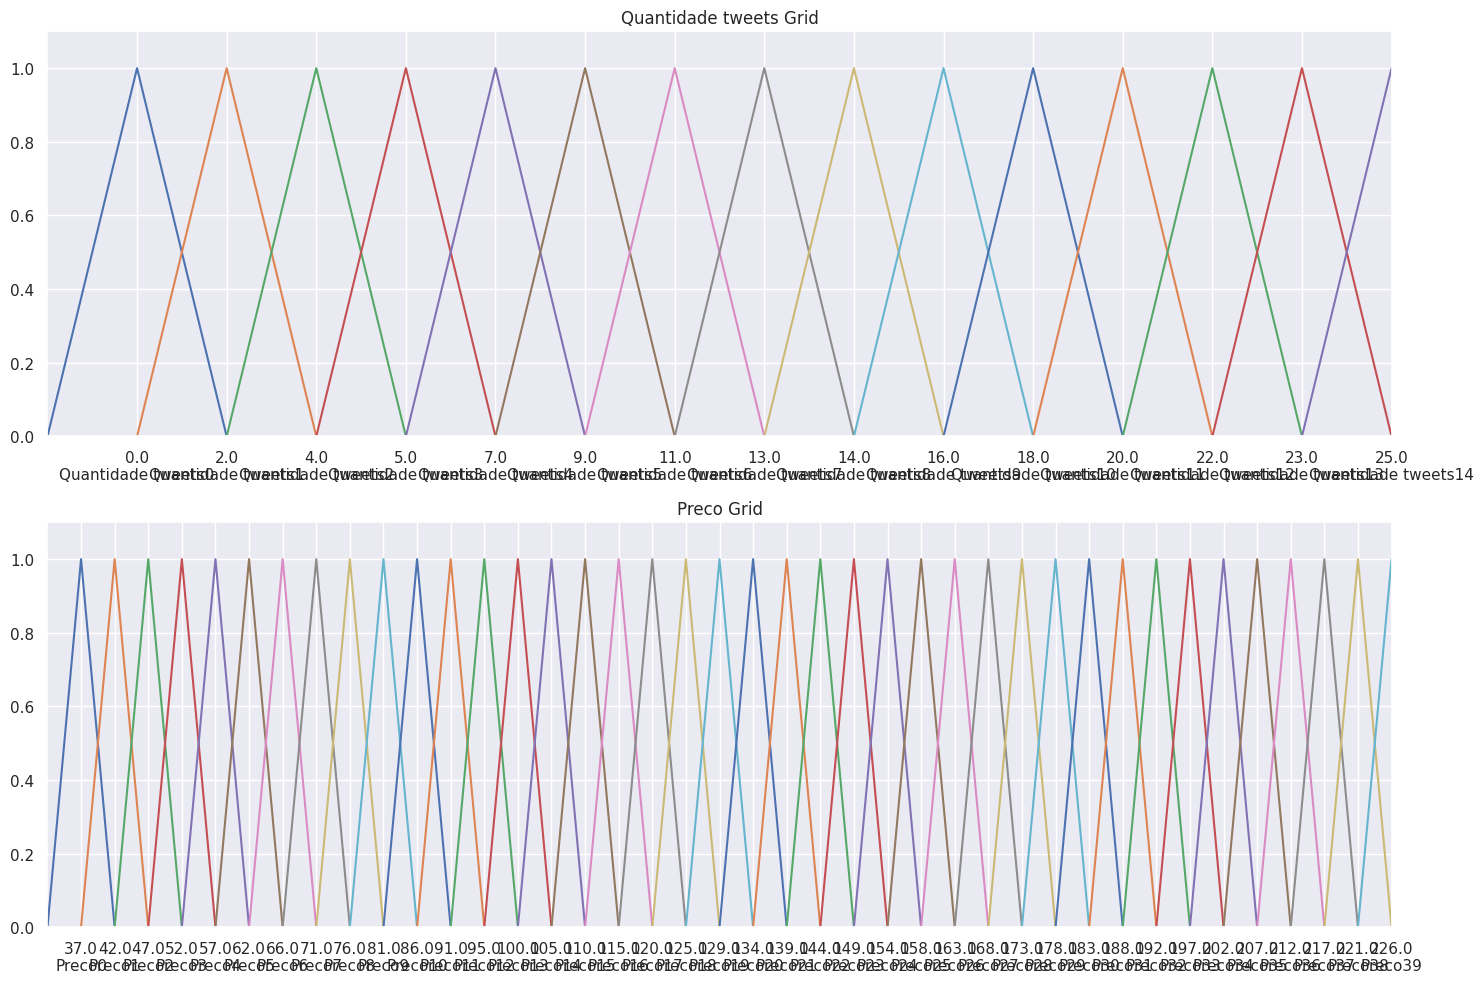

In [28]:
from pyFTS.models.multivariate import common, variable, mvfts, wmvfts


fig, axes = plt.subplots(nrows=2, ncols=1,figsize=[15,10])

vcount_tweets = variable.Variable("Quantidade tweets", data_label="Count_tweets", partitioner=Grid.GridPartitioner, npart=15, data=train_m)#,
                        #transformation=diff)
#model.append_variable(vcount_tweets)
vcount_tweets.partitioner.plot(axes[0])
"""
v_sent_agg = variable.Variable("Sentimento agregado", data_label="Sent_aggreg", partitioner=Grid.GridPartitioner, npart=10, data=train_m)#,
                        #transformation=diff)
#model.append_variable(v_sent_agg)
v_sent_agg.partitioner.plot(axes[0])
"""
v_price = variable.Variable("Preco", data_label="Price", partitioner=Grid.GridPartitioner, npart=40, data=train_m)#,
                        #transformation=diff)#train)
#model.append_variable(v_price)
v_price.partitioner.plot(axes[1])

#model.target_variable = v_price

#model = mvfts.MVFTS(explanatory_variables=v_sent_agg, target_variable=v_price)

plt.tight_layout()

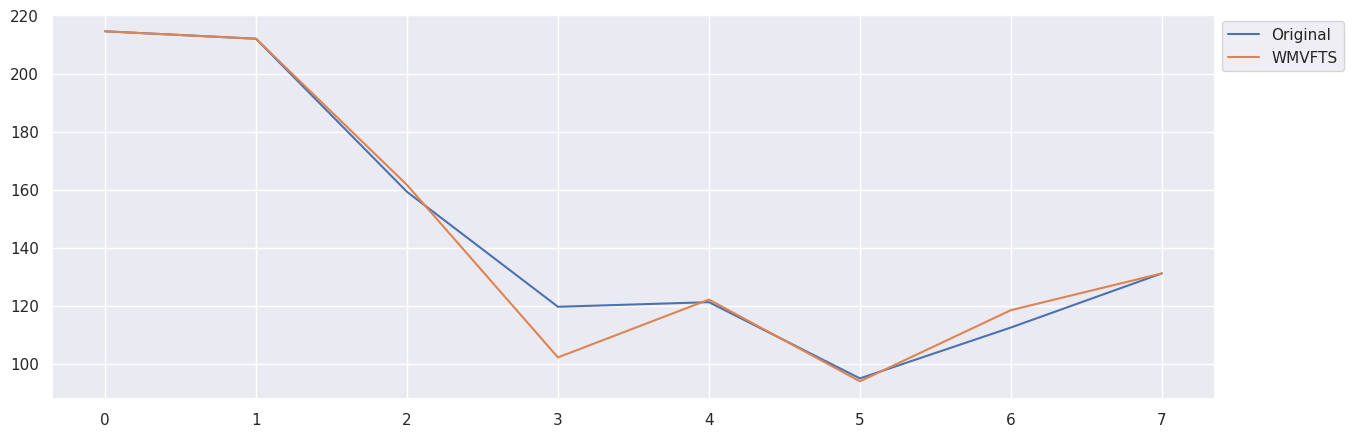

In [29]:

model_s = wmvfts.WeightedMVFTS(explanatory_variables=[vcount_tweets, v_price], target_variable=v_price)
model_s.fit(train_m)

#forecasts1 = model1.predict(test)
#forecasts2 = model2.predict(test)

forecasts_s = model_s.predict(test_m)

fig, ax = plt.subplots(nrows=1, ncols=1,figsize=[15,5])

ax.plot(test_u, label='Original')
#ax.plot(forecasts1, label='With transformation')
#ax.plot(forecasts2, label='Without transformation')
ax.plot(forecasts_s, label='WMVFTS')

handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, loc=2, bbox_to_anchor=(1, 1))

In [30]:
forecasts_s

[214.55,
 211.99,
 161.6185596026579,
 102.2076060889578,
 122.13660256410255,
 93.9709313151994,
 118.48162351371025,
 131.15]

In [ ]:
from pyFTS.benchmarks import Measures
rmse_m, mape_m, u_m = Measures.get_point_statistics(test_m, model_s)
#rmse2, mape2, u2 = Measures.get_point_statistics(test, model2)

In [ ]:
def MDA(original, forecasts):
   n = len(original)
   m = n-1
   count =0
   for t in range(1,n):
      # print(original[t], original[t-1])
      # print(forecasts[t], forecasts[t-1])

      y = 1 if float(original[t]) - float(original[t-1]) >= 0 else -1
      f = 1 if float(forecasts [t]) - float(forecasts[t-1]) >=0 else -1
      count += 1 if y == f else 0
   return count/m

In [ ]:
 mda = MDA(test_u, forecasts_s)

In [ ]:
stat_m = [rmse_m, mape_m, mda]

In [ ]:
stat_m

[29.65, 19.98, 1.0]

In [ ]:
df_stat_m = pd.DataFrame([stat_m], columns=['RMSE','MAPE','MDA'])

In [ ]:
df_stat_m

,RMSE,MAPE,MDA
0,29.65,19.98,1.0


In [ ]:
prev = []
orig = []
mdas = []
rmses = []
mapes = []

for j in range(0,23):
  train_s = dados.iloc[:53+j]
  test_s = dados.iloc[53+j:56+j]
  model_s = wmvfts.WeightedMVFTS(explanatory_variables=[vcount_tweets, v_price], target_variable=v_price)
  model_s.fit(train_s)

  forecasts_s = model_s.predict(test_s)
  original = dados['Price'].values[53+j:56+j]

  mda = MDA(original, forecasts_s)
  rmse = Measures.rmse(original, forecasts_s)
  mape = Measures.mape(original, forecasts_s)

  prev.append(forecasts_s)
  orig.append(original)
  mdas.append(mda)
  rmses.append(rmse)
  mapes.append(mape)


In [ ]:
prev

[[90.30384775388677, 68.50807444835156, 82.93],
 [69.07468033279537, 82.93, 76.05826618224333],
 [82.93, 76.05826618224333, 78.39496775874316],
 [79.78865666499621, 80.88599028962798, 97.4141666666667],
 [80.88599028962798, 97.4141666666667, 95.44151664076664],
 [97.4141666666667, 95.44151664076664, 113.45228728819899],
 [95.44151664076664, 113.45228728819899, 122.53],
 [113.45228728819899, 122.53, 123.98000000000002],
 [122.53, 123.98000000000002, 120.18999999999998],
 [123.98000000000002, 120.18999999999998, 129.31],
 [120.52108372077988, 129.31, 158.15000000000003],
 [129.31, 158.15000000000003, 168.13],
 [158.15000000000003, 168.13, 165.61],
 [168.13, 165.61, 166.9],
 [165.61, 166.9, 179.62999999999997],
 [166.41984796057412, 179.62999999999997, 205.73000000000002],
 [179.62999999999997, 205.73000000000002, 214.55],
 [205.73000000000002, 214.55, 211.99],
 [214.55, 211.99, 161.6185596026579],
 [211.99, 161.6185596026579, 102.2076060889578],
 [161.6185596026579, 102.2076060889578, 12

In [ ]:
orig

[array([90.92, 81.35, 82.93]),
 array([81.35, 82.93, 82.69]),
 array([82.93, 82.69, 82.37]),
 array([82.69, 82.37, 99.5 ]),
 array([82.37, 99.5 , 98.45]),
 array([ 99.5 ,  98.45, 108.9 ]),
 array([ 98.45, 108.9 , 122.53]),
 array([108.9 , 122.53, 123.98]),
 array([122.53, 123.98, 120.19]),
 array([123.98, 120.19, 129.31]),
 array([120.19, 129.31, 158.15]),
 array([129.31, 158.15, 168.13]),
 array([158.15, 168.13, 165.61]),
 array([168.13, 165.61, 166.9 ]),
 array([165.61, 166.9 , 179.63]),
 array([166.9 , 179.63, 205.73]),
 array([179.63, 205.73, 214.55]),
 array([205.73, 214.55, 211.99]),
 array([214.55, 211.99, 159.25]),
 array([211.99, 159.25, 119.65]),
 array([159.25, 119.65, 121.23]),
 array([119.65, 121.23,  94.97]),
 array([121.23,  94.97, 112.5 ])]

In [ ]:
mdas

[1.0,
 1.0,
 0.5,
 0.5,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [ ]:
mapes

[5.487901345364085,
 7.703169658977662,
 4.2819400571398445,
 2.4688842206628903,
 2.317934173833656,
 3.1108031235366194,
 2.4120314875790654,
 1.3934151479029675,
 7.761957862506608e-15,
 7.761957862506608e-15,
 0.09182231488474041,
 5.990454090084098e-15,
 5.990454090084098e-15,
 0.0,
 5.274120772403275e-15,
 0.09589615327060878,
 9.879138583839624e-15,
 4.60501781143635e-15,
 0.49577385717591005,
 5.355056183695537,
 5.604335120180604,
 5.459222413824463,
 2.372272980256021]

In [ ]:
mean_mape = np.mean(mapes)

In [ ]:
mean_mape

2.1152373147080312

In [ ]:
median_mape = np.median(mapes)

In [ ]:
median_mape

1.3934151479029675

In [ ]:
rmses

[7.422818320657619,
 8.05529569831007,
 4.463958435761128,
 2.233888885814276,
 2.2806400883455815,
 3.372684013834601,
 3.1503593274991206,
 2.628264291270194,
 1.160311428702309e-14,
 1.160311428702309e-14,
 0.19115127531657058,
 1.6409281590473078e-14,
 1.6409281590473078e-14,
 0.0,
 1.6409281590473078e-14,
 0.27721590921448463,
 2.320622857404618e-14,
 1.6409281590473078e-14,
 1.3674885241862178,
 10.162794562181295,
 10.17626500160287,
 10.100448369489158,
 3.540239460166399]

In [ ]:
mean_rmse = np.mean(rmses)

In [ ]:
mean_rmse

3.0184135723325958

In [ ]:
median_rmse = np.median(rmses)

In [ ]:
median_rmse

2.233888885814276

In [ ]:
mean_mdas = np.mean(mdas)

In [ ]:
mean_mdas

0.9565217391304348

In [ ]:
median_mdas = np.median(mdas)

In [ ]:
median_mdas

1.0

In [ ]:
lista_tuplas = list(zip(rmses, mapes, mdas))

In [ ]:
df_statistic = pd.DataFrame(lista_tuplas, columns=['RMSE','MAPE','MDA'])

In [ ]:
df_statistic

,RMSE,MAPE,MDA
0,7.422818e+00,5.487901e+00,1.0
1,8.055296e+00,7.703170e+00,1.0
2,4.463958e+00,4.281940e+00,0.5
3,2.233889e+00,2.468884e+00,0.5
4,2.280640e+00,2.317934e+00,1.0
5,3.372684e+00,3.110803e+00,1.0
6,3.150359e+00,2.412031e+00,1.0
7,2.628264e+00,1.393415e+00,1.0
8,1.160311e-14,7.761958e-15,1.0
9,1.160311e-14,7.761958e-15,1.0


In [31]:
resultados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/analise-dados-master/dados/result_to_graf.csv')

In [32]:
resultados

,original,prev3,prev2_sent,prev2_cont
0,214.55,214.550000,214.550000,214.550000
1,211.99,211.990000,211.990000,211.990000
2,159.25,160.026103,160.895141,161.618560
3,119.65,114.440682,112.494121,102.207606
4,121.23,121.300501,119.480577,122.136603
5,94.97,98.558615,99.665638,93.970931
6,112.50,116.429662,111.068040,118.481624
7,131.15,131.150000,131.150000,131.150000


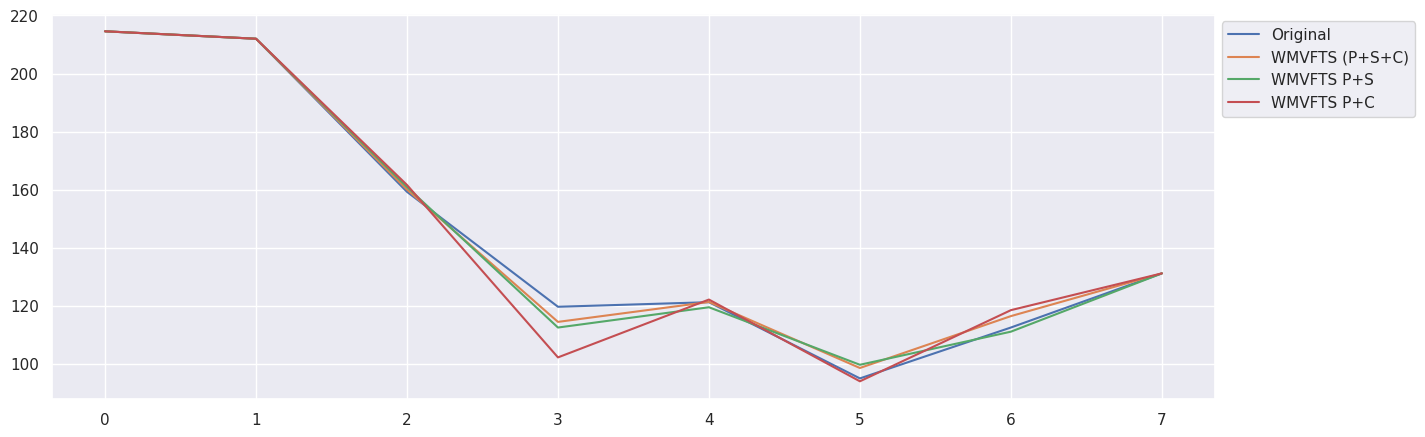

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=[15,5])

ax.plot(resultados['original'].values, label='Original')
ax.plot(resultados['prev3'].values, label='WMVFTS (P+S+C)')
ax.plot(resultados['prev2_sent'].values, label='WMVFTS P+S')
ax.plot(resultados['prev2_cont'].values, label='WMVFTS P+C')

handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, loc=2, bbox_to_anchor=(1, 1))